In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 33.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
data = pd.read_csv("Energy_consumption.csv", index_col=0)
data.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.14,43.43,"1,565.69",5,On,Off,2.77,Monday,No,75.36
2022-01-01 01:00:00,27.73,54.23,"1,411.06",1,On,On,21.83,Saturday,No,83.40
2022-01-01 02:00:00,28.70,58.91,"1,755.72",2,Off,Off,6.76,Sunday,No,78.27
2022-01-01 03:00:00,20.08,50.37,"1,452.32",1,Off,On,8.62,Wednesday,No,56.52
2022-01-01 04:00:00,23.10,51.40,"1,094.13",9,On,Off,3.07,Friday,No,70.81


# Understand the Energy consumption Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 1000

    :Number of Attributes: 10 numeric/categorical

    :Attribute Information (in order):
        1. TimeStamp     The chronological record of each data point, providing a time-based context.
        2. Temperature       Randomly generated values representing ambient temperatures in degrees Celsius.
        3. Humidity    Randomly generated values reflecting the humidity level as a percentage.
        4. SquareFootage     Simulated values representing the size of the environment in square footage.
        5. Occupancy      Randomly generated integer values indicating the number of occupants.
        6. HVACUsage       Categorical variable denoting the HVAC system's operational state ('On' or 'Off').
        7. LightingUsage      Categorical variable indicating the lighting system's operational state ('On' or 'Off').
        8. RenewableEnergy      Randomly generated values representing the contribution of renewable energy sources as a percentage.
        9. DayOfWeek      Categorical variable indicating the day of the week.
        10. Holiday      Categorical variable denoting whether the day is a holiday ('Yes' or 'No')
        11. EnergyConsumption      Simulated values representing energy consumption, calculated based on a simplified formula incorporating various features in KWh.

      :Missing Attribute Values: None

## Explatory Data Analysis

In [ ]:
data.shape

(1000, 10)

In [ ]:
data.columns

Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage',
       'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

## Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2022-01-01 00:00:00 to 2022-02-11 15:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        1000 non-null   float64
 1   Humidity           1000 non-null   float64
 2   SquareFootage      1000 non-null   float64
 3   Occupancy          1000 non-null   int64  
 4   HVACUsage          1000 non-null   object 
 5   LightingUsage      1000 non-null   object 
 6   RenewableEnergy    1000 non-null   float64
 7   DayOfWeek          1000 non-null   object 
 8   Holiday            1000 non-null   object 
 9   EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 85.9+ KB


In [ ]:
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? False


In [ ]:
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


## Descriptive Statistics

In [ ]:
data.describe()

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption
count,"1,000.00","1,000.00","1,000.00","1,000.00","1,000.00","1,000.00"
mean,24.98,45.40,"1,500.05",4.58,15.13,77.06
std,2.84,8.52,288.42,2.87,8.75,8.14
min,20.01,30.02,"1,000.51",0.00,0.01,53.26
25%,22.65,38.30,"1,247.11",2.00,7.63,71.54
50%,24.75,45.97,"1,507.97",5.00,15.07,76.94
75%,27.42,52.42,"1,740.34",7.00,22.88,82.92
max,30.00,59.97,"1,999.98",9.00,29.97,99.20


## Visualize the features

### Temperature

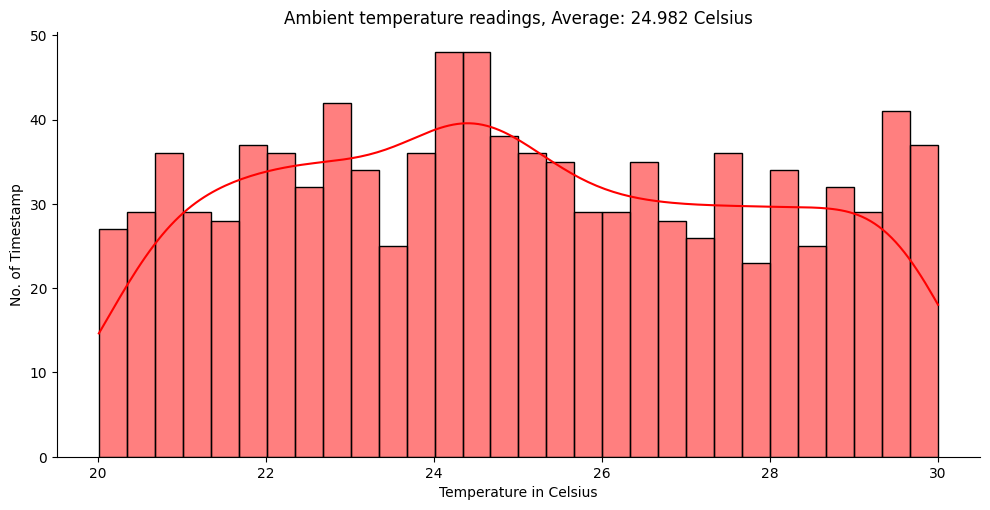

In [ ]:
sns.displot(data['Temperature'],
            bins=30,
            aspect=2,
            kde=True,
            color='red')

plt.title(f'Ambient temperature readings, Average: {(data.Temperature.mean()):.6} Celsius')
plt.xlabel('Temperature in Celsius')
plt.ylabel('No. of Timestamp')

plt.show()

### Energy consumption

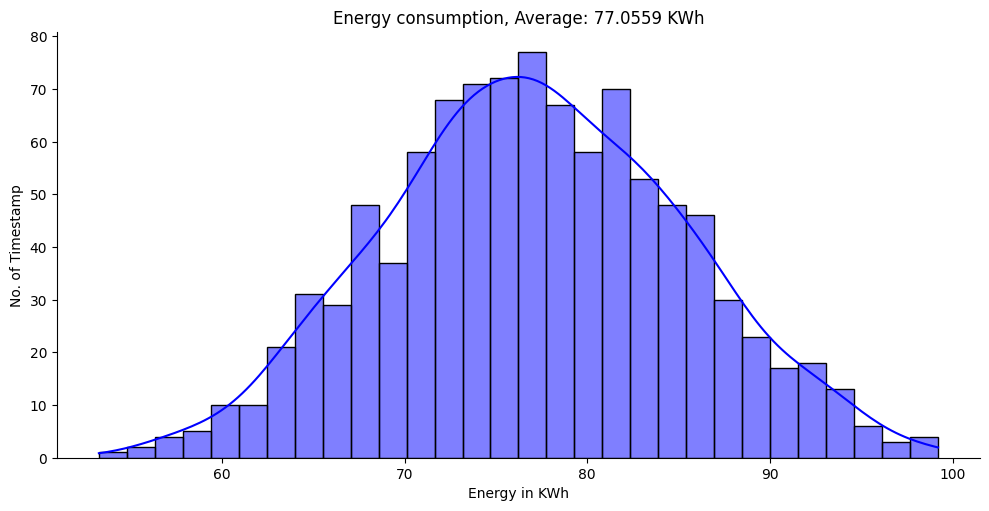

In [ ]:
sns.displot(data['EnergyConsumption'],
            bins=30,
            aspect=2,
            kde=True,
            color='blue')

plt.title(f'Energy consumption, Average: {(data.EnergyConsumption.mean()):.6} KWh')
plt.xlabel('Energy in KWh')
plt.ylabel('No. of Timestamp')

plt.show()

### Day of the week

In [ ]:
day_of_week = data["DayOfWeek"].value_counts()
day_of_week.head()

DayOfWeek
Friday      164
Sunday      154
Thursday    146
Tuesday     146
Saturday    143
Name: count, dtype: int64

In [ ]:
fig = px.bar(x=day_of_week.index, y=day_of_week.values,
            color=day_of_week.values,
            color_continuous_scale=px.colors.sequential.haline, title="HVAC usage in days", labels={"color" : "No. of days"})

fig.update_layout(xaxis_title="Days", yaxis_title="No. of days")
fig.show()

## Understanding the relationship between data

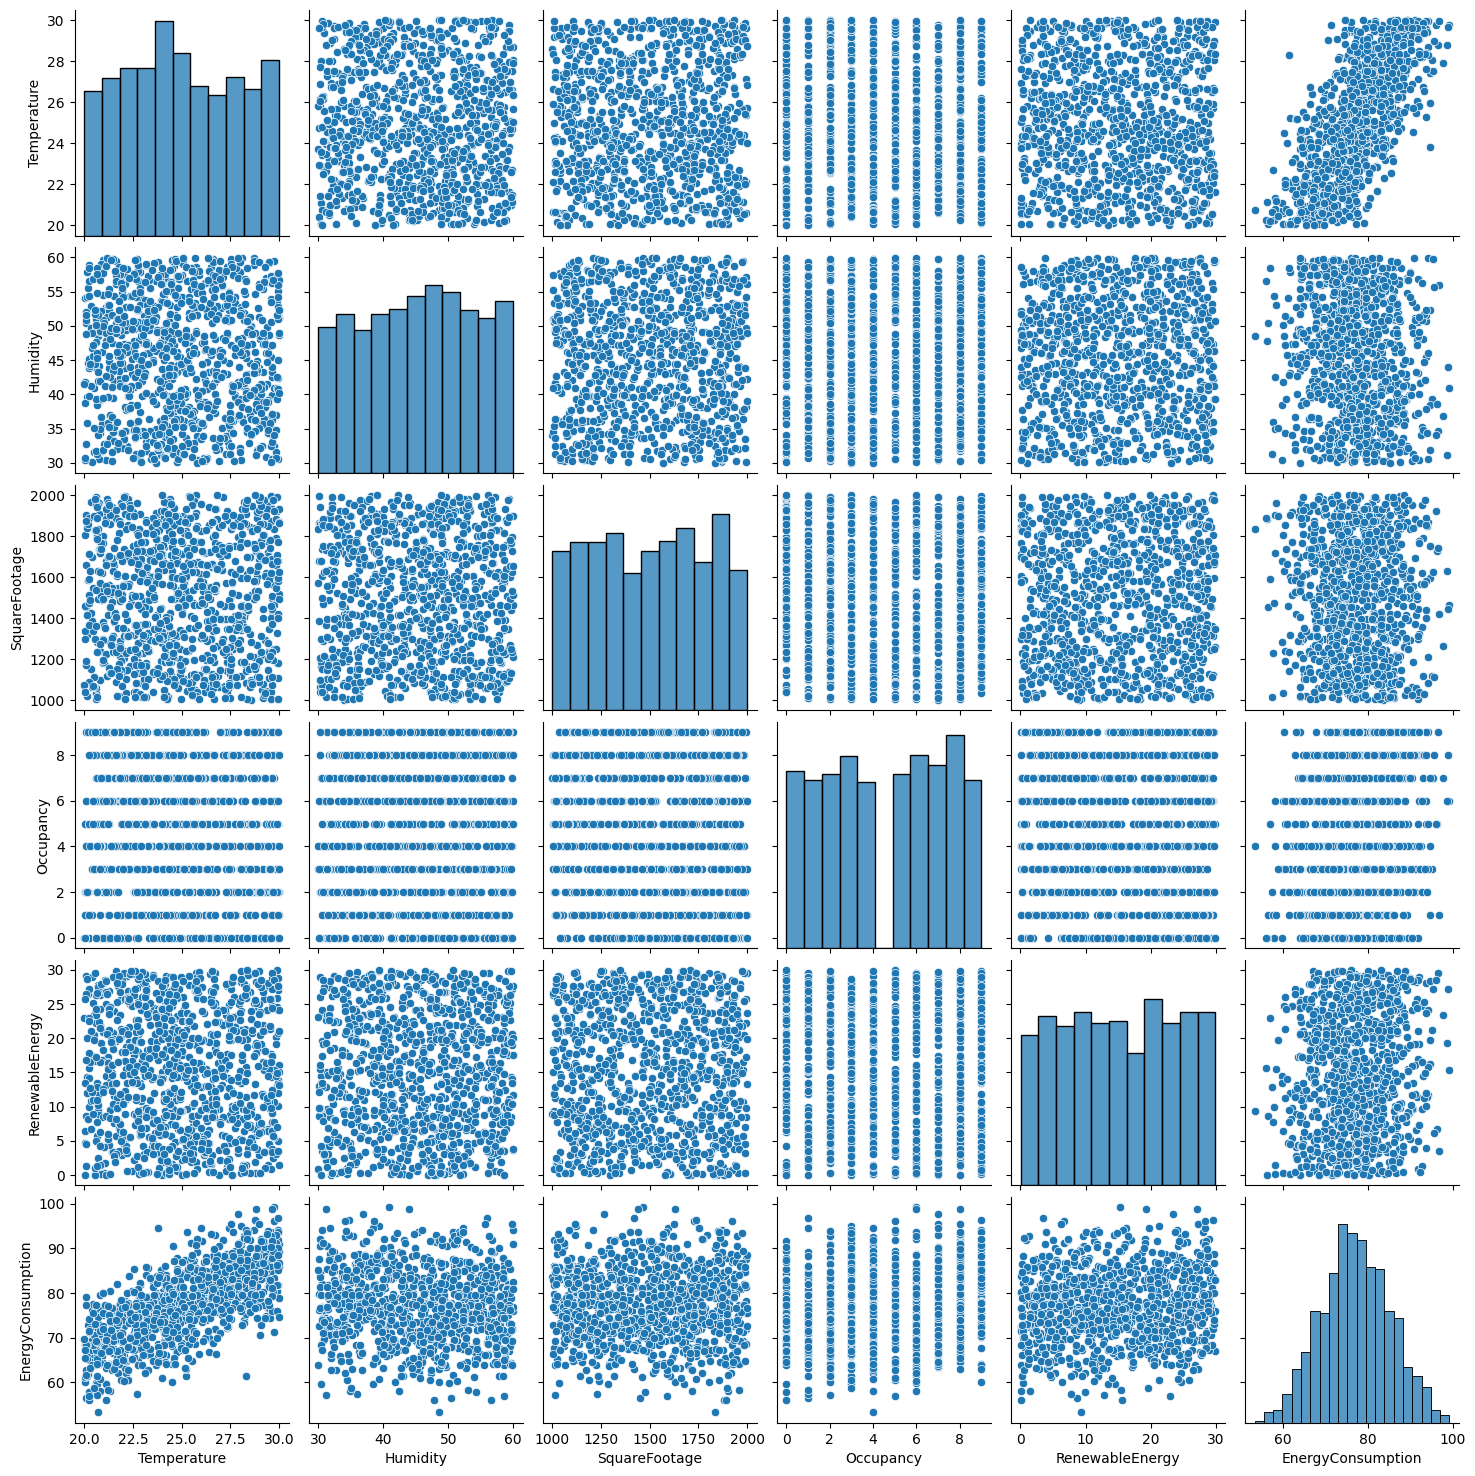

In [ ]:
sns.pairplot(data)
plt.show()

### Temperature v/s Energy Consumption

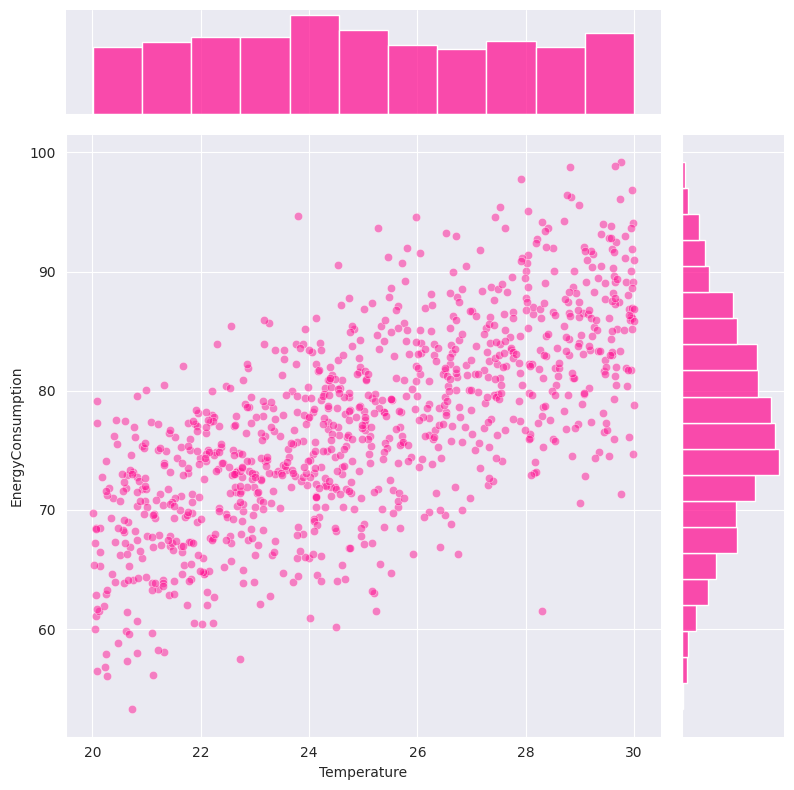

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['Temperature'],
                y=data['EnergyConsumption'],
                height=8,
                kind='scatter',
                color='deeppink',
                joint_kws={'alpha':0.5})

plt.show()

### Humidity v/s Energy Consumption

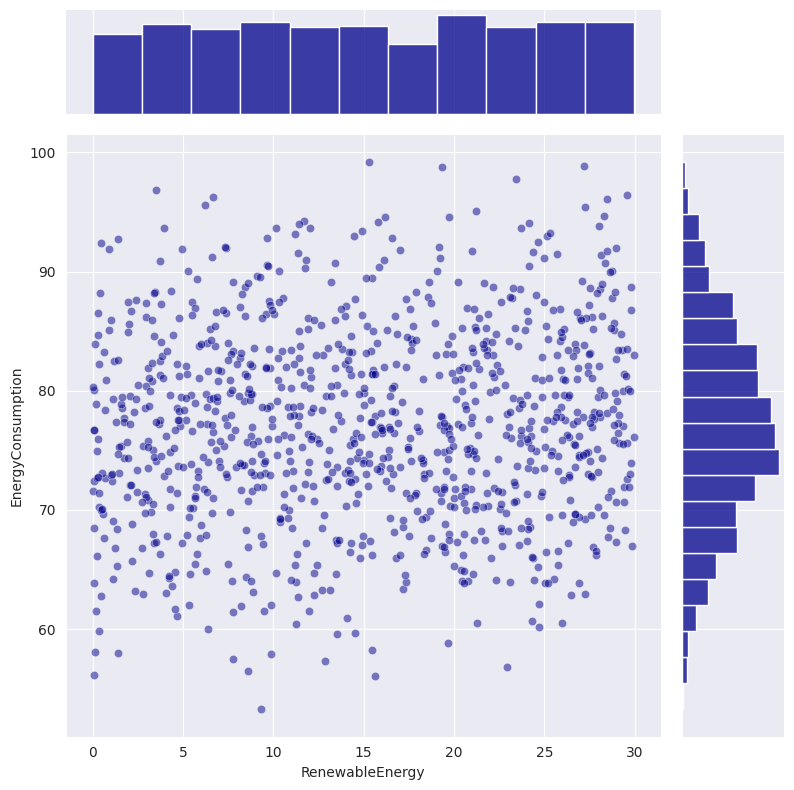

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=data['RenewableEnergy'],
                y=data['EnergyConsumption'],
                height=8,
                kind='scatter',
                color='darkblue',
                joint_kws={'alpha':0.5})

plt.show()

# Split training and Test dataset

In [ ]:
new_df = data[data["HVACUsage"] == "On"]

target = new_df["EnergyConsumption"]
features = new_df.drop(["EnergyConsumption", "HVACUsage", "LightingUsage", "Holiday", "DayOfWeek"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=10)

In [ ]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 79.9% of the total data.
Test data makes up the remaining 20.1%.


## Multivariable Regression

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.6


## Evaluate the Coefficients of the Model

In [ ]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
Temperature,1.99
Humidity,-0.08
SquareFootage,0.00
Occupancy,0.54
RenewableEnergy,0.04


# Estimated values and Regression Residuals

In [ ]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

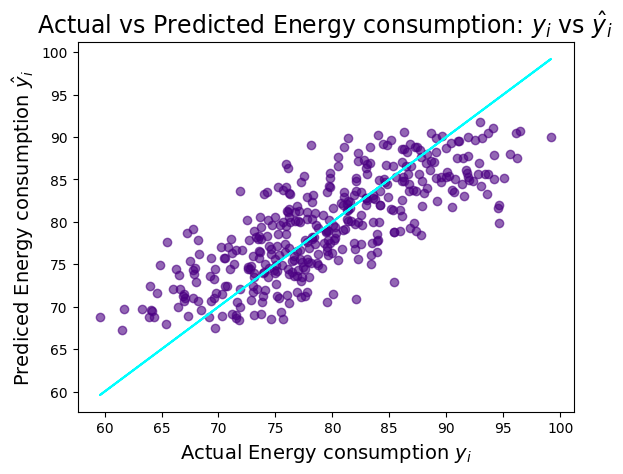

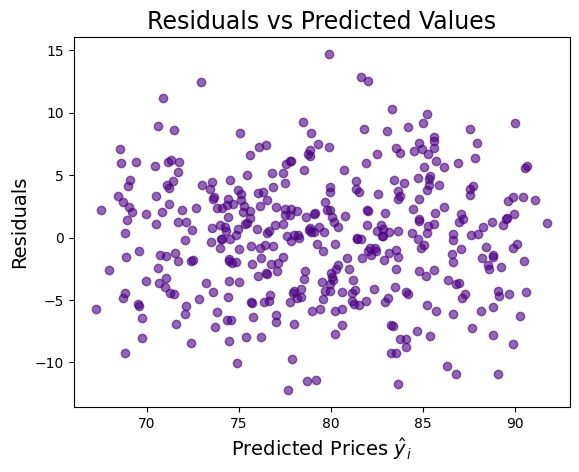

In [ ]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Energy consumption: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Energy consumption $y _i$', fontsize=14)
plt.ylabel('Prediced Energy consumption $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

### Residual distribution chart

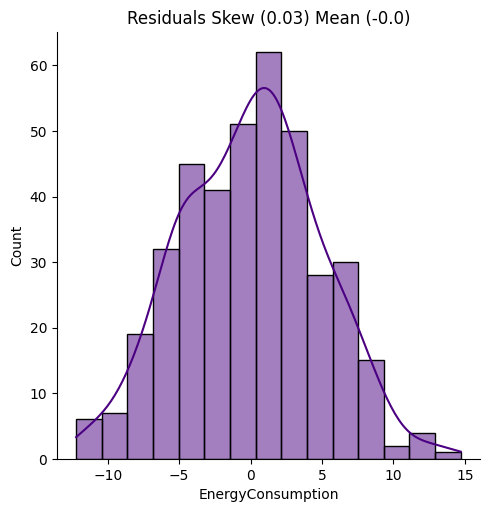

In [ ]:
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Predicting Energy consumption using the Regression Coefficient

$$ Energy \hat Consumption = \theta _0 + \theta _1 Temperature + \theta _2 Humidity + \theta _3 SquareFootage + \theta _4 Occupancy+ \theta _5 Renewable Energy$$

In [ ]:
# Starting Point: Average Values in the Dataset
avg_df = data[data["HVACUsage"] == "On"]
features = avg_df.drop(["EnergyConsumption", "HVACUsage", "LightingUsage", "Holiday", "DayOfWeek"], axis=1)

average_vals = features.mean().values
energy_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
energy_stats

,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy
0,24.99,44.58,"1,505.40",4.62,15.28


In [ ]:
# Make prediction
estimate = regr.predict(energy_stats)[0]
print(f'The energy estimate is {estimate}KWh')

The energy estimate is 79.4898849899327KWh


The energy consumption for an average HVAC user is around **80KWh**